<a href="https://colab.research.google.com/github/Viroslav/Projects/blob/main/ML(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Disable warnings in Anaconda
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [ ]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [ ]:
data = pd.read_csv(DATA_PATH + "credit_scoring_sample.csv", sep=";")
data.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


In [ ]:
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

In [ ]:
data.isna().sum()

SeriousDlqin2yrs                           0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
NumberOfTimes90DaysLate                    0
NumberOfTime60-89DaysPastDueNotWorse       0
MonthlyIncome                           8643
NumberOfDependents                      1117
dtype: int64

Distribution of the target:


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

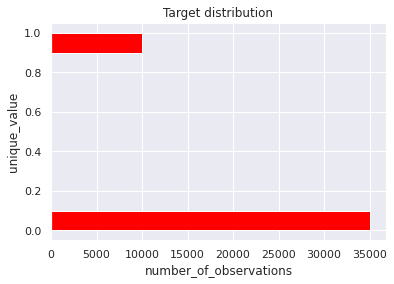

In [ ]:
ax = data["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of the target:")
data["SeriousDlqin2yrs"].value_counts() / data.shape[0]

In [ ]:
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [ ]:
def fill_nan(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [ ]:
table = fill_nan(data)

In [ ]:
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

Question 2. Make an interval estimate of the average age for the customers who delayed repayment at the 90% confidence level. Use the example from the article as reference, if needed. Also, use np.random.seed(0) as before. What is the resulting interval estimate?

In [ ]:
def get_bootstrap_samples(data, n_samples):
    """Generate samples using bootstrapping."""
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples


def stat_intervals(stat, alpha):
    """Make an interval estimate."""
    boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
    return boundaries


# Save the ages of those who let a delay
churn = data[data["SeriousDlqin2yrs"] == 1]["age"].values

# Set the random seed for reproducibility
np.random.seed(0)

# Generate bootstrap samples and calculate the mean for each sample
churn_mean_scores = [np.mean(sample) for sample in get_bootstrap_samples(churn, 1000)]

# Print the interval estimate for the sample means
print("Mean interval", stat_intervals(churn_mean_scores, 0.1))

Mean interval [45.71379414 46.12700479]


# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [ ]:
lr = LogisticRegression(random_state=5, class_weight="balanced")

In [ ]:
parameters = {"C": (0.0001, 0.001, 0.01, 0.1, 1, 10)}

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [ ]:
best_lr = GridSearchCV(lr, param_grid = parameters, scoring = 'roc_auc', cv = skf, verbose =1, n_jobs = -1)

In [ ]:
best_lr.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=5),
             n_jobs=-1, param_grid={'C': (0.0001, 0.001, 0.01, 0.1, 1, 10)},
             scoring='roc_auc', verbose=1)

In [ ]:
best_lr.best_params_, best_lr.best_score_

({'C': 0.001}, 0.8089120626797153)

In [ ]:
 best_lr.best_estimator_

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

Question 4. Can we consider the best model stable? The model is stable if the standard deviation on validation is less than 0.5%. Save the ROC AUC value of the best model, it will be useful for the following tasks.

In [ ]:
best_lr.cv_results_

{'mean_fit_time': array([0.48956676, 0.39278016, 0.44878016, 0.54215512, 0.60834646,
        0.51790543]),
 'std_fit_time': array([0.07231617, 0.06413131, 0.13409264, 0.12815941, 0.1436813 ,
        0.1289339 ]),
 'mean_score_time': array([0.0094615 , 0.00888801, 0.00858436, 0.00872464, 0.00859704,
        0.00801301]),
 'std_score_time': array([0.00123713, 0.00062183, 0.00010878, 0.00039778, 0.00013851,
        0.00113463]),
 'param_C': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10}],
 'split0_test_score': array([0.77984662, 0.80917719, 0.80929853, 0.79170083, 0.78384333,
        0.79174075]),
 'split1_test_score': array([0.78759234, 0.8179555 , 0.79419876, 0.79394974, 0.79514694,
        0.80495945]),
 'split2_test_score': array([0.78635422, 0.79530418, 0.79821275, 0.798

In [ ]:
best_lr.cv_results_["std_test_score"]*100  #so, the deviation on valid is bigger than 0.5%

array([0.72921669, 0.81375592, 0.79515992, 0.51626703, 0.73594795,
       0.51725023])

Question 5. Feature importance is defined by the absolute value of its corresponding coefficient. First, you need to normalize all of the feature values so that it will be valid to compare them. What is the most important feature for the best logistic regression model?



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler = scaler.fit(X)

In [ ]:
scaler.fit_transform(X)

array([[ 0.87289113, -0.12143243, -0.14257696, ..., -0.08220789,
         0.17167558, -0.68545299],
       [ 0.46337311, -0.12143243,  1.4256924 , ..., -0.08220789,
        -0.09140726, -0.68545299],
       [-0.69692794, -0.12143243, -0.14249339, ..., -0.08220789,
         0.04048588, -0.68545299],
       ...,
       [-0.90168695, -0.12143243, -0.1424854 , ..., -0.08220789,
        -0.28186095,  1.09481664],
       [-0.28740992,  0.04026338, -0.14248161, ..., -0.08220789,
         0.48487781,  3.76522109],
       [-0.42391593,  0.20195918, -0.14235282, ..., -0.08220789,
         0.25626305,  1.09481664]])

In [ ]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.87289113, -0.12143243, -0.14257696, ..., -0.08220789,
         0.17167558, -0.68545299],
       [ 0.46337311, -0.12143243,  1.4256924 , ..., -0.08220789,
        -0.09140726, -0.68545299],
       [-0.69692794, -0.12143243, -0.14249339, ..., -0.08220789,
         0.04048588, -0.68545299],
       ...,
       [-0.90168695, -0.12143243, -0.1424854 , ..., -0.08220789,
        -0.28186095,  1.09481664],
       [-0.28740992,  0.04026338, -0.14248161, ..., -0.08220789,
         0.48487781,  3.76522109],
       [-0.42391593,  0.20195918, -0.14235282, ..., -0.08220789,
         0.25626305,  1.09481664]])

In [ ]:
lr = LogisticRegression(random_state=5, class_weight="balanced", C = 0.001)

In [ ]:
lr.fit(X_scaled, y)

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [ ]:
lr.coef_

array([[-0.41670229,  0.72342698, -0.02409605,  0.51678764,  0.19355764,
        -0.16314632,  0.1014432 ]])

In [ ]:
feat_imp = pd.DataFrame({'feature_imp': lr.coef_.flatten()}, index = X.columns).sort_values(by='feature_imp', ascending = False)
feat_imp

,feature_imp
NumberOfTime30-59DaysPastDueNotWorse,0.723427
NumberOfTimes90DaysLate,0.516788
NumberOfTime60-89DaysPastDueNotWorse,0.193558
NumberOfDependents,0.101443
DebtRatio,-0.024096
MonthlyIncome,-0.163146
age,-0.416702


Question 6. Calculate how much DebtRatio affects the prediction using the softmax function. What is its value?

In [ ]:
feat_imp.loc['DebtRatio']['feature_imp']

-0.02409605224751083

In [ ]:
print((np.exp(lr.coef_[0]) / np.sum(np.exp(lr.coef_[0])))[2])

0.11426375283065268


In [ ]:
lr.coef_[0][2]

-0.02409605224751083

In [ ]:
(np.exp(lr.coef_[0]))

array([0.65921714, 2.06148579, 0.97619194, 1.67663304, 1.21355933,
       0.84946689, 1.10676705])

In [ ]:
np.sum(np.exp(lr.coef_[0]))

8.543321181403357

In [ ]:
(np.exp(lr.coef_[0])) / np.sum(np.exp(lr.coef_[0]))

array([0.0771617 , 0.24129794, 0.11426375, 0.19625073, 0.14204772,
       0.09943052, 0.12954763])

In [ ]:
((np.exp(lr.coef_[0])) / np.sum(np.exp(lr.coef_[0])))[2]

0.11426375283065268

Question 7. Let’s see how we can interpret the impact of our features. For this, recalculate the logistic regression with absolute values, that is without scaling. Next, modify the customer’s age by adding 20 years, keeping the other features unchanged. How many times will the chance that the customer will not repay their debt increase? You can find an example of the theoretical calculation here.



In [ ]:
lr = LogisticRegression(random_state=5, class_weight="balanced", C = 0.001)

In [ ]:
lr.fit(X, y)

LogisticRegression(C=0.001, class_weight='balanced', random_state=5)

In [ ]:
feat_imp = pd.DataFrame({'feature_imp': lr.coef_.flatten()}, index = X.columns).sort_values(by='feature_imp', ascending = False)
feat_imp

,feature_imp
NumberOfTime30-59DaysPastDueNotWorse,0.446832
NumberOfTimes90DaysLate,0.390381
NumberOfTime60-89DaysPastDueNotWorse,0.216038
NumberOfDependents,0.191726
DebtRatio,-0.000006
MonthlyIncome,-0.000011
age,-0.013656


In [ ]:
np.exp(lr.coef_[0][0] * 20)

0.7610086991667803

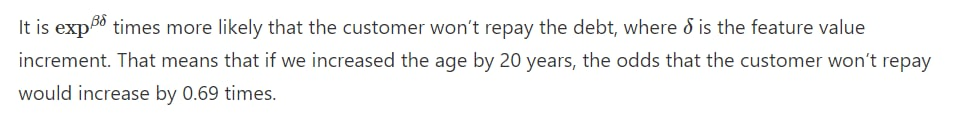

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
    n_estimators=100, n_jobs=-1, random_state=42, class_weight="balanced"
)

In [ ]:
parameters = {
    "max_features": [1, 2, 4],
    "min_samples_leaf": [3, 5, 7, 9],
    "max_depth": [5, 10, 15],
}

In [ ]:
%%time
rf_grid_search = GridSearchCV(
    rf, parameters, n_jobs=-1, scoring="roc_auc", cv=skf, verbose=True
)
rf_grid_search = rf_grid_search.fit(X, y)
print(rf_grid_search.best_score_ - best_lr.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.04782313714144015
CPU times: user 8.62 s, sys: 536 ms, total: 9.15 s
Wall time: 7min 44s


In [ ]:
independent_columns_names[
    np.argmin(rf_grid_search.best_estimator_.feature_importances_)
]

'NumberOfDependents'

In [ ]:
pd.DataFrame(
    {
        "feat": independent_columns_names,
        "coef": rf_grid_search.best_estimator_.feature_importances_,
    }
).sort_values(by="coef", ascending=False)

,feat,coef
1,NumberOfTime30-59DaysPastDueNotWorse,0.300290
3,NumberOfTimes90DaysLate,0.278749
4,NumberOfTime60-89DaysPastDueNotWorse,0.156534
0,age,0.115860
2,DebtRatio,0.076082
5,MonthlyIncome,0.057994
6,NumberOfDependents,0.014491


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

parameters = {
    "max_features": [2, 3, 4],
    "max_samples": [0.5, 0.7, 0.9],
    "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10, 100],
}

Question 11. Fit a bagging classifier with random_state=42. For the base classifiers, use 100 logistic regressors and use RandomizedSearchCV instead of GridSearchCV. It will take a lot of time to iterate over all 54 variants, so set the maximum number of iterations for RandomizedSearchCV to 20. Don’t forget to set the parameters cv and random_state=1. What is the best ROC AUC you achieve?

In [ ]:
bg = BaggingClassifier(
    LogisticRegression(class_weight="balanced"),
    n_estimators=100,
    n_jobs=-1,
    random_state=42,
)
r_grid_search = RandomizedSearchCV(
    bg,
    parameters,
    n_jobs=-1,
    scoring="roc_auc",
    cv=skf,
    n_iter=20,
    random_state=1,
    verbose=True,
)
r_grid_search = r_grid_search.fit(X, y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
r_grid_search.best_score_

0.8087951623513827